In [34]:
import pandas as pd

from id_signaling.figures import *

In [35]:
disliking = pd.read_csv('data/basic/disliking/full.csv')
receptivity = pd.read_csv('data/basic/receptivity/full.csv')

In [36]:
disliking.head()

,disliking,homophily,initial_prop_churlish,initial_prop_covert,prop_churlish,prop_covert,timestep,trial_idx
0,0.0,0.0,0.5,0.5,0.51,0.47,0,3403698271
1,0.0,0.0,0.5,0.5,0.52,0.46,1,3403698271
2,0.0,0.0,0.5,0.5,0.53,0.46,2,3403698271
3,0.0,0.0,0.5,0.5,0.54,0.45,3,3403698271
4,0.0,0.0,0.5,0.5,0.54,0.46,4,3403698271


In [37]:
receptivity.head()

,homophily,initial_prop_churlish,initial_prop_covert,prop_churlish,prop_covert,receptivity,timestep,trial_idx
0,0.0,0.5,0.5,0.55,0.45,0.0,0,971098657
1,0.0,0.5,0.5,0.48,0.42,0.0,1,971098657
2,0.0,0.5,0.5,0.40,0.43,0.0,2,971098657
3,0.0,0.5,0.5,0.32,0.48,0.0,3,971098657
4,0.0,0.5,0.5,0.33,0.47,0.0,4,971098657


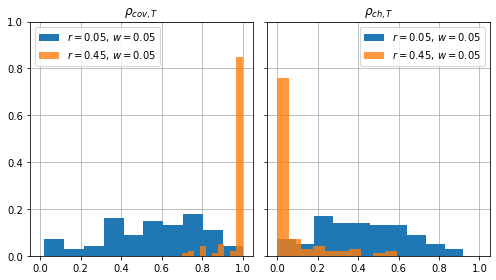

In [56]:
dis_rec = 0.05
homophily = 0.05

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(7, 4))

df = disliking
pre = mean_final_cov_prop = df[
    (df.timestep == 500) &
    (df.disliking == dis_rec) &
    (df.homophily == homophily)
]
prop_cov = pre.prop_covert
L = len(prop_cov)
assert L == 100
bins = 10
pre.prop_covert.hist(weights=np.ones(L)/L, label=f'$r={dis_rec}$, $w={homophily}$', 
                     ax=axes[0], bins=bins)
pre.prop_churlish.hist(weights=np.ones(L)/L, label=f'$r={dis_rec}$, $w={homophily}$', 
                       ax=axes[1], bins=bins)

dis_rec = 0.45
homophily = 0.05

df = disliking
pre = mean_final_cov_prop = df[
    (df.timestep == 500) &
    (df.disliking == dis_rec) &
    (df.homophily == homophily)
]
prop_cov = pre.prop_covert
L = len(prop_cov)

assert L == 100

pre.prop_covert.hist(weights=np.ones(L)/L, label=f'$r={dis_rec}$, $w={homophily}$', 
                     alpha=0.8, ax=axes[0], bins=bins)
pre.prop_churlish.hist(weights=np.ones(L)/L, label=f'$r={dis_rec}$, $w={homophily}$', 
                     alpha=0.8, ax=axes[1], bins=bins)

axes[0].set_title(r'$\rho_{cov,T}$')
axes[1].set_title(r'$\rho_{ch,T}$')

for ax in axes:
    ax.legend()
    ax.set_axisbelow(True)
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(0, 1.0)

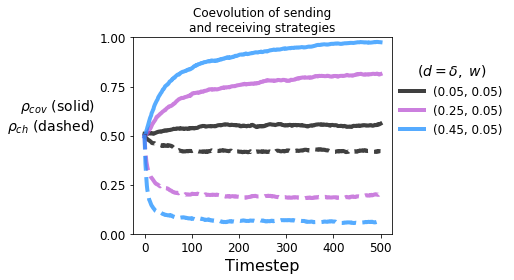

In [94]:
colors = ['black',  'mediumorchid', 'dodgerblue','darkorange', 'purple', 'black']
param_vals=[0.05, 0.25, 0.45]
hvals = [0.05]
ax = plot_evolution(disliking, experiment='disliking', exp_param_vals=param_vals, 
               homophily_vals=hvals, figsize=(7.25, 4), color=colors)
plt.ylim(0, 1)

plot_evolution(disliking, experiment='disliking', strategy='receiving', exp_param_vals=param_vals, 
               homophily_vals=hvals, figsize=(7.25, 4), ls='--', ax=ax, color=colors)
plt.ylim(0, 1)

plt.title('Coevolution of sending\nand receiving strategies')
plt.ylabel(r'$\rho_{cov}$ (solid)' '\n' r'$\rho_{ch}$ (dashed)', 
           rotation=0, ha='right', size=14)
plt.yticks(np.arange(0, 1.01, 0.25));
handles, labels = ax.get_legend_handles_labels()

ax.legend(handles[:3], labels[:3], bbox_to_anchor=(1.01, 0.9), loc='upper left', 
          ncol=1, title=r'$(d=\delta,~w)$', borderaxespad=0, frameon=False, prop={'size': 12}, 
          title_fontsize=14)

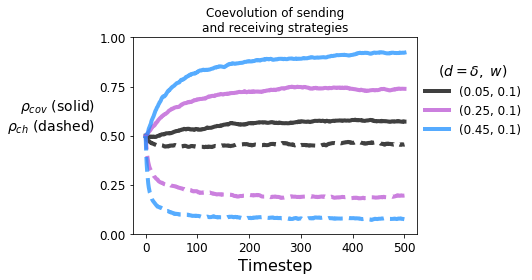

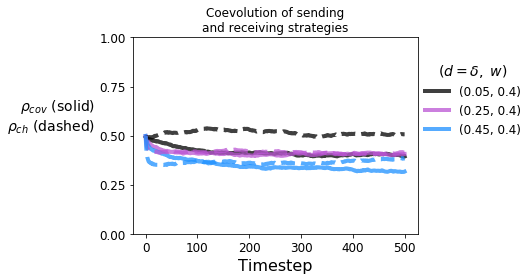

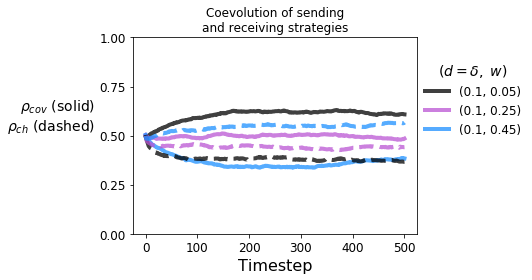

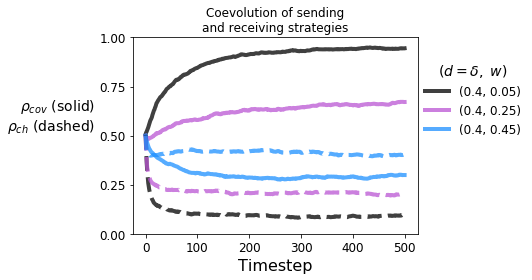

In [142]:
from id_signaling.figures import plot_coevolution


param_vals=[0.05, 0.25, 0.45]
hvals = [0.1]
plot_coevolution(disliking, 'disliking', param_vals, hvals, savefig_path='reports/Figures/disliking_evo_w=0p1.pdf')

param_vals=[0.05, 0.25, 0.45]
hvals = [0.4]
plot_coevolution(disliking, 'disliking', param_vals, hvals, savefig_path='reports/Figures/disliking_evo_w=0p4.pdf')


hvals = [0.05, 0.25, 0.45]
param_vals = [0.1]
plot_coevolution(disliking, 'disliking', param_vals, hvals, savefig_path='reports/Figures/disliking_evo_d=0p1.pdf')

hvals = [0.05, 0.25, 0.45]
param_vals = [0.4]
plot_coevolution(disliking, 'disliking', param_vals, hvals, savefig_path='reports/Figures/disliking_evo_d=0p4.pdf')

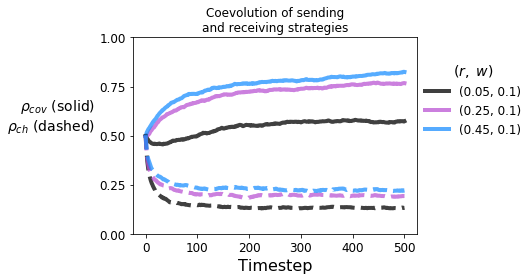

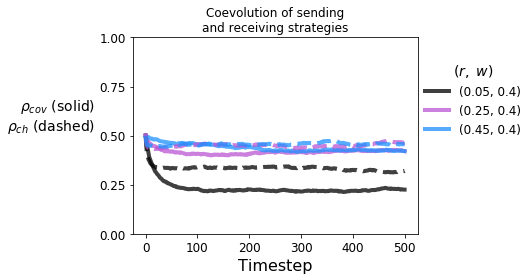

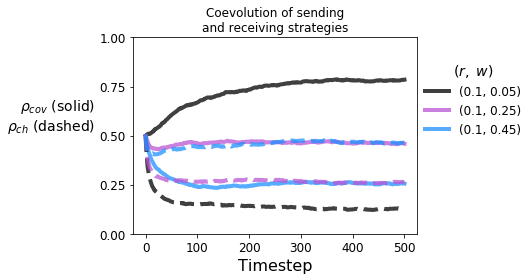

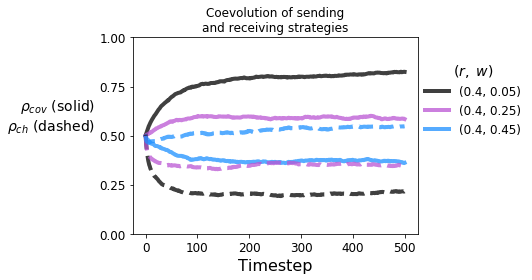

In [141]:

param_vals=[0.05, 0.25, 0.45]
hvals = [0.1]
plot_coevolution(receptivity, 'receptivity', param_vals, hvals, savefig_path='reports/Figures/receptivity_evo_w=0p1.pdf')

param_vals=[0.05, 0.25, 0.45]
hvals = [0.4]
plot_coevolution(receptivity, 'receptivity', param_vals, hvals, savefig_path='reports/Figures/receptivity_evo_w=0p4.pdf')


hvals = [0.05, 0.25, 0.45]
param_vals = [0.1]
plot_coevolution(receptivity, 'receptivity', param_vals, hvals, savefig_path='reports/Figures/receptivity_evo_r=0p1.pdf')

hvals = [0.05, 0.25, 0.45]
param_vals = [0.4]
plot_coevolution(receptivity, 'receptivity', param_vals, hvals, savefig_path='reports/Figures/receptivity_evo_r=0p4.pdf')

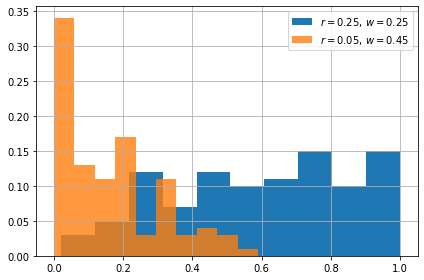

In [43]:
dis_rec = 0.25
homophily = 0.25

df = receptivity
pre = mean_final_cov_prop = df[
    (df.timestep == 500) &
    (df.receptivity == dis_rec) &
    (df.homophily == homophily)
]
prop_cov = pre.prop_covert
L = len(prop_cov)
assert L == 100
pre.prop_covert.hist(weights=np.ones(L)/L, label=f'$r={dis_rec}$, $w={homophily}$')

dis_rec = 0.05
homophily = 0.45

df = receptivity
pre = mean_final_cov_prop = df[
    (df.timestep == 500) &
    (df.receptivity == dis_rec) &
    (df.homophily == homophily)
]
prop_cov = pre.prop_covert
L = len(prop_cov)
assert L == 100
pre.prop_covert.hist(weights=np.ones(L)/L, label=f'$r={dis_rec}$, $w={homophily}$', alpha=0.8)

plt.legend()

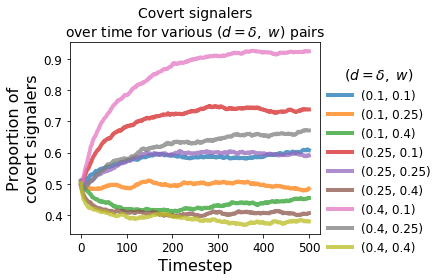

In [41]:
plot_evolution(disliking, experiment='disliking', figsize=(6.25, 4))